UCSanDiegoX: DSE200x Python for Data Science

Week 4 - Pandas / part 3

based ml-20m.zip from https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

Pandas: Merging DataFrames

* pandas.concat() to stack df
* pandas.concat(axis=1, join='inner') to join wrt the row index
* df.append(df2) as concat()

For real merge use df.merge()

In [2]:
tags = pd.read_csv('./movielens/tags.csv')
movies = pd.read_csv('./movielens/movies.csv')
print(tags.head())
print(movies.head())

print('-- merge w/ explicit on')
t = movies.merge(tags, on='movieId', how='inner')
print(t.head())

print('-- merge w/ implicit on')
t2 = movies.merge(tags, how='inner')
print(t2.head())

   userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
-- merge w/ explicit on
   movieId             title                                       genres  \
0        1  Toy Story (1995)

Combine aggreagation, merging, and filters to get useful analytics

In [3]:
ratings = pd.read_csv('./movielens/ratings.csv', parse_dates=['timestamp'])

In [4]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
print(avg_ratings.head())

# average userId is meaningless, could be a good idea to keep orginal index
print(ratings.groupby('movieId').mean().head())

   movieId    rating
0        1  3.921240
1        2  3.211977
2        3  3.151040
3        4  2.861393
4        5  3.064592
               userId    rating
movieId                        
1        69282.396821  3.921240
2        69169.928202  3.211977
3        69072.079388  3.151040
4        69652.913280  2.861393
5        69113.475454  3.064592


In [5]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [6]:
is_highly_rated = box_office['rating'] >= 4.1

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26665,131027,But Forever in My Mind (1999),Comedy|Drama,4.5
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26682,131082,Playground (2009),(no genres listed),4.5
26729,131176,A Second Chance (2014),Drama,4.5


In [7]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [8]:
# notice the logical AND operator, here is a single ampersand
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
26448,129719,That's Life (1998),Comedy,4.50
26496,129905,The Floating Castle (2012),Comedy|Drama,5.00
26557,130347,Bill Hicks: Sane Man (1989),Comedy,5.00
26647,130970,George Carlin: Life Is Worth Losing (2005),Comedy,4.75
26665,131027,But Forever in My Mind (1999),Comedy|Drama,4.50


Vectorized String Operations

* str.split('|')
* str.contains('foo')
* str.replace('x','y')
* str.extract('(\d)') # gets the first single digit in the string

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# Split 'genres' into multiple columns
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [11]:
# Add a new column for comedy genre flag
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [12]:
# Extract year from title: e.g. (1995) 
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


Parsing Timestamps

In [13]:
print(tags.dtypes)
print('---')

# Unix time
print('timestamp:', tags.iloc[0]['timestamp'])

tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
print('datetime:', tags.iloc[0]['parsed_time'])
print('datetime type:', tags['parsed_time'].dtype)

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object
---
timestamp: 1240597180
datetime: 2009-04-24 18:19:40
datetime type: datetime64[ns]


In [14]:
# Selecting rows based on timestamps
greater_than_t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greater_than_t]
print(tags.shape, selected_rows.shape)

# Sorting the table using the timestamps
print(tags.sort_values(by='parsed_time', ascending=True)[:10])

(465564, 5) (12130, 5)
        userId  movieId              tag   timestamp         parsed_time
333932  100371     2788     monty python  1135429210 2005-12-24 13:00:10
333927  100371     1732    coen brothers  1135429236 2005-12-24 13:00:36
333924  100371     1206  stanley kubrick  1135429248 2005-12-24 13:00:48
333923  100371     1193   jack nicholson  1135429371 2005-12-24 13:02:51
333939  100371     5004    peter sellers  1135429399 2005-12-24 13:03:19
333922  100371       47   morgan freeman  1135429412 2005-12-24 13:03:32
333921  100371       47        brad pitt  1135429412 2005-12-24 13:03:32
333936  100371     4011        brad pitt  1135429431 2005-12-24 13:03:51
333937  100371     4011      guy ritchie  1135429431 2005-12-24 13:03:51
333920  100371       32     bruce willis  1135429442 2005-12-24 13:04:02


Average Movie Ratings over Time

Are Movie ratings related to the year of launch?

In [15]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [16]:
joined = movies.merge(average_rating, on='movieId', how='inner')
print(joined.head())
print(joined.corr())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  3.921240  
1                   Adventure|Children|Fantasy  1995  3.211977  
2                               Comedy|Romance  1995  3.151040  
3                         Comedy|Drama|Romance  1995  2.861393  
4                                       Comedy  1995  3.064592  
          movieId    rating
movieId  1.000000 -0.090369
rating  -0.090369  1.000000


In [17]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


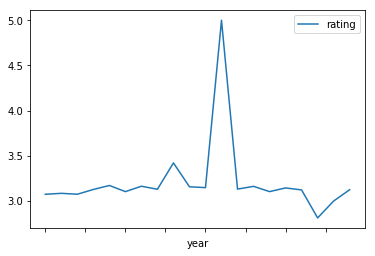

In [18]:
yearly_average[-20:].plot(x='year', y='rating')